# 커머스 데이터 품질 검사
이해원

함수 목록
- 함수: 설명

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

plt.rcParams['font.family'] ='D2Coding'

In [2]:
event_df = pd.read_csv('C:/Users/LOVE/Downloads/vscode/DQ/events.csv')
orditem_df = pd.read_csv('C:/Users/LOVE/Downloads/vscode/DQ/order_items.csv')

In [3]:
event_df.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,NaN,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,NaN,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,NaN,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,NaN,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,NaN,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel


In [5]:
# id 1~2431963
event_df.describe(include='all')

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
count,2.431963e+06,1.306292e+06,2.431963e+06,2431963,2431963,2431963,2408883,2431963,2431963,2431963,2431963,2431963,2431963
unique,NaN,NaN,NaN,681759,2143390,681683,8775,231,17324,5,5,35530,6
top,NaN,NaN,NaN,b174d8d5-a07f-44c1-a1c2-226f495b4cf4,2020-10-21 16:07:00+00:00,196.46.153.171,Shanghai,Guangdong,02675-031,Chrome,Email,/cart,product
freq,NaN,NaN,NaN,13,8,17,60561,129796,10147,1218687,1091988,595994,845607
mean,1.215982e+06,4.996636e+04,3.316146e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.020474e+05,2.881711e+04,2.676365e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.079915e+05,2.500500e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.215982e+06,4.992700e+04,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.823972e+06,7.483900e+04,4.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
orditem_df.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02


In [7]:
orditem_df.describe(include='all')

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
count,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759,181759,118281,63841,18232,181759.000000
unique,NaN,NaN,NaN,NaN,NaN,5,181526,79123,43187,12478,NaN
top,NaN,NaN,NaN,NaN,NaN,Shipped,2022-09-25 02:27:43+00:00,2023-12-26 19:56:00+00:00,2023-09-06 16:25:00+00:00,2023-09-20 00:54:00+00:00,NaN
freq,NaN,NaN,NaN,NaN,NaN,54440,2,9,9,6,NaN
mean,90880.000000,62579.982609,49983.272020,15254.151838,245291.860007,NaN,NaN,NaN,NaN,NaN,59.568544
std,52469.448126,36125.987285,28830.895739,8413.482833,141661.912894,NaN,NaN,NaN,NaN,NaN,66.657262
min,1.000000,1.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,0.020000
25%,45440.500000,31266.500000,25031.500000,7979.500000,122565.000000,NaN,NaN,NaN,NaN,NaN,24.500000
50%,90880.000000,62529.000000,49983.000000,15966.000000,245284.000000,NaN,NaN,NaN,NaN,NaN,39.990002
75%,136319.500000,93845.500000,74867.500000,22504.000000,367983.000000,NaN,NaN,NaN,NaN,NaN,69.949997


In [6]:
print(event_df.shape, orditem_df.shape)

(2431963, 13) (181759, 11)


In [8]:
event_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431963 entries, 0 to 2431962
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   user_id          float64
 2   sequence_number  int64  
 3   session_id       object 
 4   created_at       object 
 5   ip_address       object 
 6   city             object 
 7   state            object 
 8   postal_code      object 
 9   browser          object 
 10  traffic_source   object 
 11  uri              object 
 12  event_type       object 
dtypes: float64(1), int64(2), object(10)
memory usage: 241.2+ MB


In [9]:
orditem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181759 entries, 0 to 181758
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181759 non-null  int64  
 1   order_id           181759 non-null  int64  
 2   user_id            181759 non-null  int64  
 3   product_id         181759 non-null  int64  
 4   inventory_item_id  181759 non-null  int64  
 5   status             181759 non-null  object 
 6   created_at         181759 non-null  object 
 7   shipped_at         118281 non-null  object 
 8   delivered_at       63841 non-null   object 
 9   returned_at        18232 non-null   object 
 10  sale_price         181759 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 15.3+ MB


### (1) 두 명 이상의 unique user가 있는 세션의 수와 비율 (파이차트)

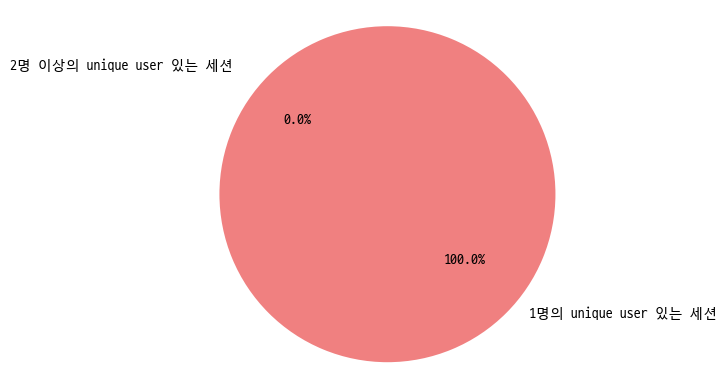

In [20]:
# 세션별 unique user
session_user_counts = event_df.groupby('session_id')['user_id'].nunique()

# 두 명 이상의 unique user 있는 세션 수
sessions_multiusers = (session_user_counts >= 2).sum()

# 전체 세션 수
total_sessions = len(session_user_counts)

# [두 명 이상의 unique user 있는 세션 / 전체 세션] 비율
ratio = sessions_multiusers / total_sessions

# 시각화
labels = ['2명 이상의 unique user 있는 세션', '1명의 unique user 있는 세션']
sizes = [sessions_multiusers, total_sessions - sessions_multiusers]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')

plt.show()


### (3)  두 가지 이상의 city를 가진 유저의 수와 비율 (파이 차트)

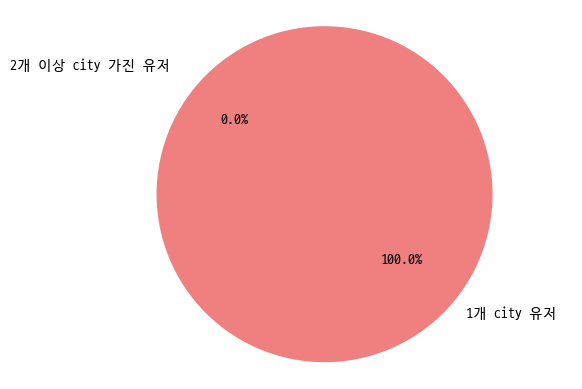

In [22]:
# 유저별 방문한 도시 수
user_city_counts = event_df.groupby('user_id')['city'].nunique()

# 두 개 이상 도시 방문한 유저 수
users_multicity = (user_city_counts >= 2).sum()

# 전체 유저 수
total_users = len(user_city_counts)

# [2개 이상의 city 가진 유저 / 전체 유저] 비율
ratio2 = users_multicity / total_users

# 시각화
labels = ['2개 이상 city 가진 유저', '1개 city 유저']
sizes = [users_multicity, total_users - users_multicity]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')

plt.show()
